In [1]:
# 디렉토리 설정
import os

os.chdir('C:\\Users\\rbden\\OneDrive\\바탕 화면\\Univ\\R & Python\\Python\\Pythondata')

os.getcwd()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_train_ver_3.csv')

df.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,4709,0,0,0,Commercial_associate_etc,2,7,3,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1540,0,0,1,Laborers,3,8,4,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,4434,0,1,0,Managers,2,10,4,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,2092,0,1,0,Sales staff,2,7,3,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,2105,0,0,0,Managers,2,5,2,2.000000,0


In [3]:
idx = list(df.columns.values).index('DAYS_EMPLOYED')

df.insert(idx + 1 , 'START_EMPLOYED' , df['DAYS_BIRTH'] - df['DAYS_EMPLOYED'])

df

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,9190,0,0,0,Commercial_associate_etc,2,7,3,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,9840,0,0,1,Laborers,3,8,4,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,14653,0,1,0,Managers,2,10,4,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,12996,0,1,0,Sales staff,2,7,3,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,12932,0,0,0,Managers,2,5,2,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,ID-8754,1,0,0,0,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,...,9757,0,1,0,Laborers,1,8,3,2.000000,0
8755,ID-8755,1,0,0,1,1,180000.0,Working,Higher education,Separated,...,12816,0,0,0,Working_etc,2,6,3,2.000000,1
8756,ID-8756,1,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,8067,0,0,0,Core staff,2,9,4,2.000000,0
8757,ID-8757,1,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,...,10038,0,0,0,Laborers,1,6,3,2.000000,0


# No.4

## 소득이   자동차를 보유하면  신용등급이 낮아진다

### 소득분위(5분위) 별 자동차 보유여부와 신용등급 barplot

In [4]:
df['income_percentile'].unique()

array([ 7,  8, 10,  5,  9,  6,  2,  3,  1,  4], dtype=int64)

#### 1. 5분위 변수 재생성

In [5]:
q_2 = df["income_total"].quantile(.2)
print('Q_2 값은 : ' ,  q_2)
print('-'*20)

q_4 = df["income_total"].quantile(.4)
print('Q_4 값은 : ' ,  q_4)
print('-'*20)

q_6 = df["income_total"].quantile(.6)
print('Q_6 값은 : ' ,  q_6)
print('-'*20)

q_8 = df["income_total"].quantile(.8)
print('Q_8 값은 : ' ,  q_8)

Q_2 값은 :  112500.0
--------------------
Q_4 값은 :  135000.0
--------------------
Q_6 값은 :  180000.0
--------------------
Q_8 값은 :  225000.0


In [6]:
idx = list(df.columns.values).index('income_percentile')

df.drop(['income_percentile' , 'income_quantile'] , axis = 1 , inplace = True)

df.insert(idx , 'income_5_qt' , np.where(df['income_total'] <= q_2 , '1st' , 
                                          np.where(df['income_total'] <= q_4 , '2nd' , 
                                                  np.where(df['income_total'] <= q_6 , '3rd' , 
                                                          np.where(df['income_total'] <= q_8 , '4th' , '5th')))))

df.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,2092,12996,0,1,0,Sales staff,2,4th,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,2105,12932,0,0,0,Managers,2,3rd,2.000000,0


In [7]:
df['income_5_qt'].sort_values().unique()

array(['1st', '2nd', '3rd', '4th', '5th'], dtype=object)

#### 2. 소득분위별 자동차 보유여부

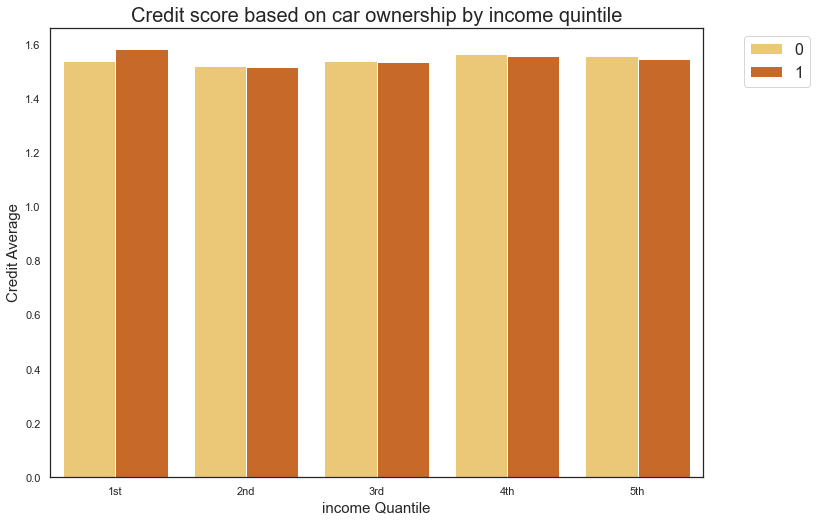

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'credit_avg' , hue = 'car' , 
             alpha = 0.3 , ci = False)

plt.legend(fontsize = 16 , bbox_to_anchor=(1.05, 1))
ax.set_title('Credit score based on car ownership by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('Credit Average' , size = 15)

plt.show()

# No.5

## 소득이 증가할수록 신용카드발급횟수 증가할 것이다

### 1. 소득분위(5분위) 별 카드 발급 횟수와 신용등급 barplot

Text(0, 0.5, '# of Credit Card')

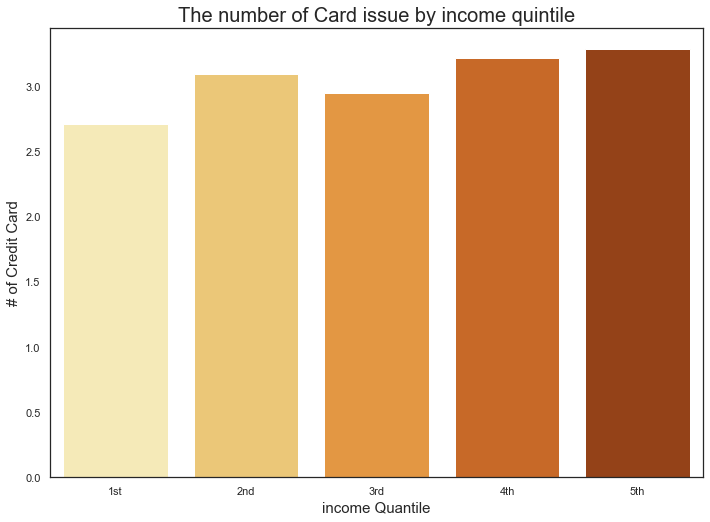

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'Counts' ,
             palette = 'YlOrBr' , ci = False)

ax.set_title('The number of Card issue by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('# of Credit Card' , size = 15)

### 2. 소득분위(5분위) 별 평균 카드 발급 횟수와 신용등급 barplot

In [10]:
con1 = df['income_5_qt'] == '1st'
mean_1st = df.loc[con1 , 'Counts'].mean()
print('1분위 그룹의 평귭 카드 발급 횟수 : ' , mean_1st)
print('-'*55)

con2 = df['income_5_qt'] == '2nd'
mean_2nd = df.loc[con2 , 'Counts'].mean()
print('2분위 그룹의 평귭 카드 발급 횟수 : ' , mean_2nd)
print('-'*55)

con3 = df['income_5_qt'] == '3rd'
mean_3rd = df.loc[con3 , 'Counts'].mean()
print('3분위 그룹의 평귭 카드 발급 횟수 : ' , mean_3rd)
print('-'*55)

con4 = df['income_5_qt'] == '4th'
mean_4th = df.loc[con4 , 'Counts'].mean()
print('4분위 그룹의 평귭 카드 발급 횟수 : ' , mean_4th)
print('-'*55)

con5 = df['income_5_qt'] == '5th'
mean_5th = df.loc[con4 , 'Counts'].mean()
print('5분위 그룹의 평귭 카드 발급 횟수 : ' , mean_5th)

1분위 그룹의 평귭 카드 발급 횟수 :  2.710595446584939
-------------------------------------------------------
2분위 그룹의 평귭 카드 발급 횟수 :  3.095306859205776
-------------------------------------------------------
3분위 그룹의 평귭 카드 발급 횟수 :  2.951106536284097
-------------------------------------------------------
4분위 그룹의 평귭 카드 발급 횟수 :  3.218926553672316
-------------------------------------------------------
5분위 그룹의 평귭 카드 발급 횟수 :  3.218926553672316


In [11]:
idx = list(df.columns.values).index('Counts')

df_1 = df[df['income_5_qt'] == '1st']

df_1.insert(idx + 1 , 'Counts_group' , np.where(df_1['Counts'] < mean_1st , 'Under' , 'Upper'))

df_1.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
9,ID-9,6,Upper,0,0,1,0,103500.0,Working,Secondary / secondary special,...,1308,14477,0,0,0,Medicine staff,2,1st,2.000000,0
28,ID-28,1,Under,1,1,0,0,112500.0,Commercial associate,Secondary / secondary special,...,2325,19786,1,1,0,Drivers,2,1st,2.000000,0
39,ID-39,5,Upper,1,1,1,2,112500.0,Working,Secondary / secondary special,...,1600,11422,0,0,0,Laborers,4,1st,2.000000,2
40,ID-40,3,Upper,1,1,1,0,90900.0,Working,Secondary / secondary special,...,2426,19274,0,0,0,Laborers,2,1st,1.333333,0
41,ID-41,5,Upper,0,0,1,2,99000.0,Commercial associate,Higher education,...,433,12319,0,1,0,Accountants,4,1st,2.000000,2


In [12]:
idx = list(df.columns.values).index('Counts')

df_2 = df[df['income_5_qt'] == '2nd']

df_2.insert(idx + 1 , 'Counts_group' , np.where(df_2['Counts'] < mean_2nd , 'Under' , 'Upper'))

df_2.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
11,ID-11,6,Upper,1,1,1,1,135000.0,Commercial associate,Higher education,...,91,11668,0,0,0,Managers,3,2nd,1.833333,1
13,ID-13,4,Upper,0,0,0,0,135000.0,Working,Higher education,...,2474,7413,0,1,0,Sales staff,2,2nd,2.000000,0
26,ID-26,5,Upper,1,1,0,1,135000.0,Working,Higher education,...,3353,14490,1,0,0,Laborers,3,2nd,2.000000,1
29,ID-29,5,Upper,0,0,1,0,121500.0,Commercial associate,Secondary / secondary special,...,1711,10306,0,1,0,Sales staff,2,2nd,0.600000,0
31,ID-31,2,Under,1,1,1,0,135000.0,Commercial associate,Higher education,...,3452,8310,1,0,1,Laborers,2,2nd,0.000000,0


In [13]:
idx = list(df.columns.values).index('Counts')

df_3 = df[df['income_5_qt'] == '3rd']

df_3.insert(idx + 1 , 'Counts_group' , np.where(df_3['Counts'] < mean_3rd , 'Under' , 'Upper'))

df_3.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
4,ID-4,1,Under,0,1,1,0,157500.0,State servant,Higher education,...,2105,12932,0,0,0,Managers,2,3rd,2.0,0
8,ID-8,5,Upper,1,1,1,1,180000.0,Commercial associate,Higher education,...,1466,13665,0,0,1,Commercial_associate_etc,3,3rd,1.6,1
12,ID-12,5,Upper,0,1,1,1,157500.0,Commercial associate,Secondary / secondary special,...,2162,9776,0,0,0,Accountants,3,3rd,0.4,1
14,ID-14,3,Upper,0,0,1,0,157500.0,Pensioner,Secondary / secondary special,...,0,22922,0,1,0,Retirement,1,3rd,2.0,0
15,ID-15,4,Upper,1,1,1,2,157500.0,Working,Secondary / secondary special,...,4056,8803,0,1,0,Drivers,4,3rd,1.0,2


In [14]:
idx = list(df.columns.values).index('Counts')

df_4 = df[df['income_5_qt'] == '4th']

df_4.insert(idx + 1 , 'Counts_group' , np.where(df_4['Counts'] < mean_4th , 'Under' , 'Upper'))

df_4.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,Upper,0,0,0,0,202500.0,Commercial associate,Higher education,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.6,0
3,ID-3,2,Under,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,...,2092,12996,0,1,0,Sales staff,2,4th,1.0,0
10,ID-10,4,Upper,0,0,1,0,193500.0,Working,Secondary / secondary special,...,2213,16850,1,1,1,Laborers,1,4th,2.0,0
18,ID-18,3,Under,0,0,1,0,216000.0,Pensioner,Secondary / secondary special,...,0,23113,0,0,0,Retirement,2,4th,2.0,0
23,ID-23,4,Upper,1,1,0,0,225000.0,Working,Secondary / secondary special,...,444,14098,1,1,1,Working_etc,2,4th,1.5,0


In [15]:
idx = list(df.columns.values).index('Counts')

df_5 = df[df['income_5_qt'] == '5th']

df_5.insert(idx + 1 , 'Counts_group' , np.where(df_5['Counts'] < mean_5th , 'Under' , 'Upper'))

df_5.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
1,ID-1,9,Upper,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,Upper,1,1,1,0,450000.0,Working,Higher education,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
5,ID-5,1,Under,0,0,1,2,270000.0,Working,Secondary / secondary special,...,4996,8417,0,0,1,High skill tech staff,4,5th,1.000000,2
6,ID-6,5,Upper,0,0,0,0,315000.0,Working,Secondary / secondary special,...,1978,15592,0,0,1,Core staff,1,5th,2.000000,0
7,ID-7,2,Under,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,...,5420,9476,0,0,1,Drivers,2,5th,0.000000,0


In [16]:
df = pd.concat([df_1 , df_2 , df_3 , df_4 , df_5])

df = df.sort_index()

df.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,Upper,0,0,0,0,202500.0,Commercial associate,Higher education,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.600000,0
1,ID-1,9,Upper,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,Upper,1,1,1,0,450000.0,Working,Higher education,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
3,ID-3,2,Under,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,...,2092,12996,0,1,0,Sales staff,2,4th,1.000000,0
4,ID-4,1,Under,0,1,1,0,157500.0,State servant,Higher education,...,2105,12932,0,0,0,Managers,2,3rd,2.000000,0


Text(0, 0.5, 'Credit Average')

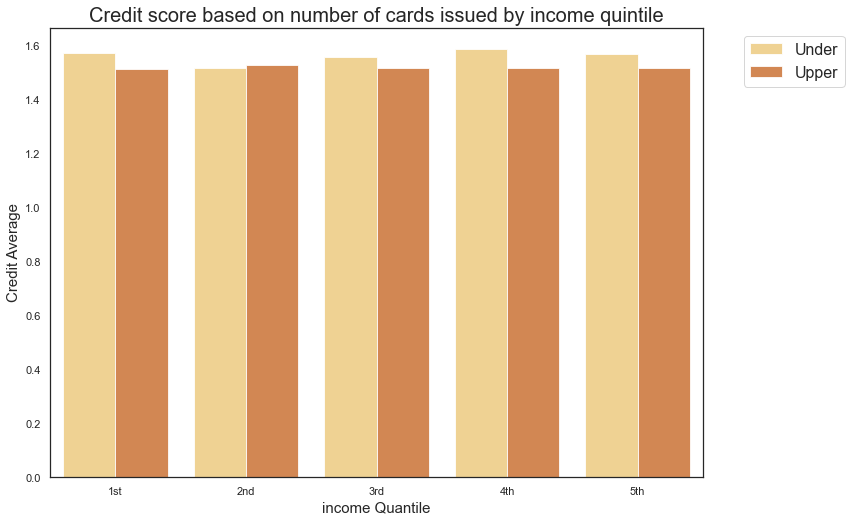

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'credit_avg' , hue = 'Counts_group'  ,
              alpha = 0.8 , palette = 'YlOrBr' , ci = False)

plt.legend(fontsize = 16 , bbox_to_anchor=(1.05, 1))
ax.set_title('Credit score based on number of cards issued by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('Credit Average' , size = 15)

#### 전체 집단 중 평균 카드발급 횟수에 따른 credit_avg

In [19]:
idx = list(df.columns.values).index('Counts_group')

df.insert(idx + 1 , 'Counts_group_all' , np.where(df['Counts'] < df['Counts'].mean() , 'Under' , 'Upper'))

df.head()

,ID,Counts,Counts_group,Counts_group_all,gender,car,reality,child_num,income_total,income_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,Upper,Upper,0,0,0,0,202500.0,Commercial associate,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.600000,0
1,ID-1,9,Upper,Upper,0,0,1,1,247500.0,Commercial associate,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,Upper,Upper,1,1,1,0,450000.0,Working,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
3,ID-3,2,Under,Under,0,0,1,0,202500.0,Commercial associate,...,2092,12996,0,1,0,Sales staff,2,4th,1.000000,0
4,ID-4,1,Under,Under,0,1,1,0,157500.0,State servant,...,2105,12932,0,0,0,Managers,2,3rd,2.000000,0


Text(0, 0.5, 'Credit Average')

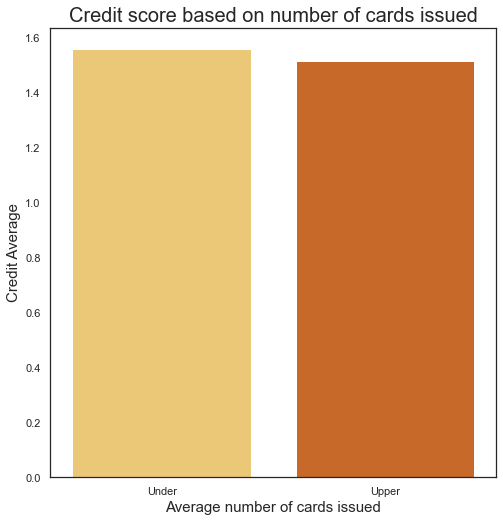

In [32]:
sns.set(rc={'figure.figsize':(8,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'Counts_group_all' , y = 'credit_avg' , 
                 alpha = 0.3, ci = False)

ax.set_title('Credit score based on number of cards issued' , size = 20 )
ax.set_xlabel('Average number of cards issued' , size = 15)
ax.set_ylabel('Credit Average' , size = 15)

# No.6

## 저소득층 내에서  income type에 따른 비교

### 1. 저소득층내에서 공무원이 신용이 제일 좋음

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'credit_avg' , hue = 'income_type'  ,
             palette = 'YlOrBr' , ci = False)

ax.set_title('Credit score based on income Type by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('Credit Average' , size = 15)

In [ ]:
df['income_type'].unique()

In [ ]:
con1 = df['income_type'] == 'Commercial associate'
con2 = df['income_type'] == 'Pensioner'

df_2 = df.loc[con1 | con2 , ]

df_2.head()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df_2.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'car' , hue = 'income_type'  ,
             palette = 'BrBG' , ci = False)

ax.set_title('Pensioner vs Commerical associate' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('Car' , size = 15)